## Load and Clean our Data

In [11]:
import pandas as pd
import numpy

TITANIC_TRAIN = 'train.csv'
TITANIC_TEST  = 'test.csv'

dataframe = pd.read_csv(TITANIC_TRAIN, header=0)

In [12]:
# Clean our data again.
dataframe.Age.fillna(dataframe.Age.mean(), inplace=True)
dataframe.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


## Find the probability that a passenger was less than 10 years old

In [34]:
total_people_on_titanic = len(dataframe.Age)

number_of_kids_under_ten = len(dataframe.Age[(dataframe.Age < 10)])
percentage_of_people_are_under_ten = number_of_kids_under_ten / total_people_on_titanic

print("The probability that a passenger was under 10 years old is %.5f%%" % (percentage_of_people_are_under_ten * 100))

The probability that a passenger was under 10 years old is 6.95847%


## Find the probability that a passenger was male

In [37]:
total_people_on_titanic = len(dataframe.Age)

number_of_males = len(dataframe.Sex[(dataframe.Sex == 'male')])

male_percentage = number_of_males / total_people_on_titanic
print("The probability that a passenger was male is %.3f%%" % (male_percentage * 100))

The probability that a passenger was male is 64.759%


## Find the probability that a passenger was female and had at least one sibling on board

In [59]:
total_people_on_titanic = len(dataframe.Age)

females_on_titanic_with_sibsp = len(dataframe.Sex[(dataframe.Sex == 'female') & (dataframe.SibSp > 1)])

percentage_of_females_with_sibsp = females_on_titanic_with_sibsp / total_people_on_titanic
clean_percentage = percentage_of_females_with_sibsp * 100
print("The probability that a passeger was a female AND had a Spouse/Sibling is %.3f%%" % clean_percentage)

The probability that a passeger was a female AND had a Spouse/Sibling is 3.816%


## Plot Distribution of Passenger Ages


import necessary libraries and titanic data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data = pd.read_csv("train.csv")



Isolate and clean the age data

In [14]:
mean_age = titanic_data.Age.mean()

titanic_data.Age.fillna(mean_age, inplace=True)

Plot distribution of passenger ages.

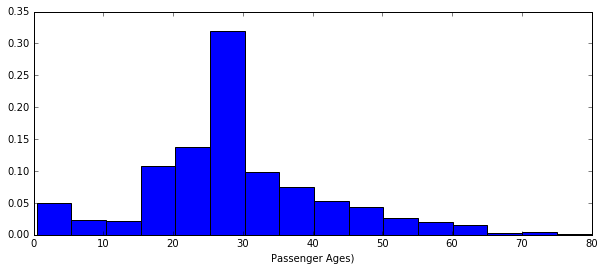

In [18]:
H, edges = np.histogram(titanic_data.Age, bins=16)

plt.figure(figsize=(10, 4))

age_plot = plt.subplot(111)
age_plot.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
age_plot.set_xlabel("Passenger Ages)")
plt.show()

## Is there a statistically significant difference between the ages of male and female survivors?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

titanic_data = pd.read_csv("train.csv")

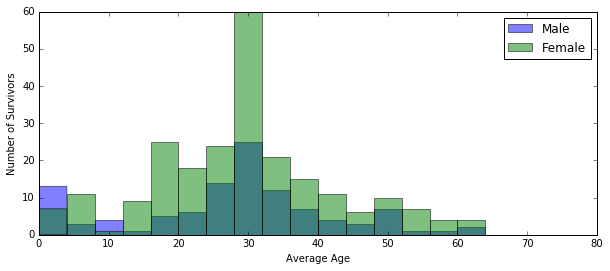

In [51]:
survived = titanic_data[titanic_data.Survived == 1]
full_age = survived.Age.fillna(survived.Age.mean())
male = full_age[survived.Sex == 'male']
female = full_age[survived.Sex == 'female']

plt.figure(figsize=(10, 4))
opacity = 0.5
plt.hist(male, bins=np.arange(0, 80, 4), alpha=opacity, label="Male")
plt.hist(female, bins=np.arange(0, 80, 4), alpha=opacity, label="Female")
plt.legend()
plt.xlabel("Average Age")
plt.ylabel("Number of Survivors")
plt.show()

In [52]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(male, female)
print("Results:\n\tt-statistic: %.5f\n\tp-value: %.5f" % (t_stat, p_value))

Results:
	t-statistic: -0.83678
	p-value: 0.40331


## Is there a statistically significant difference between the fares paid by passengers from Queenstown and the passengers from Cherbourg?

In [60]:
titanic_data.Fare.fillna(titanic_data.Fare.mean(), inplace = True)
titanic_data.drop(['Cabin'], axis = 1, inplace = True)

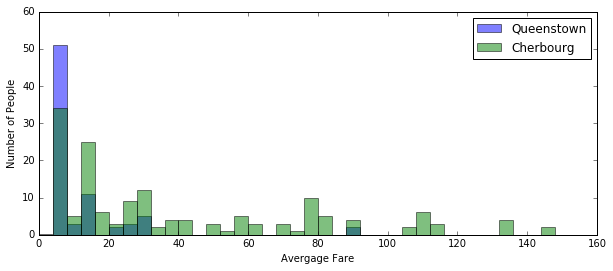

In [69]:
titanic_data.Embarked.fillna(0, inplace = True)
qtown = titanic_data[titanic_data.Embarked == 'Q']
ctown = titanic_data[titanic_data.Embarked == 'C']
plt.figure(figsize=(10, 4))
opacity = 0.5
plt.hist(qtown.Fare, bins=np.arange(0, 150, 4), alpha=opacity, label="Queenstown")
plt.hist(ctown.Fare, bins=np.arange(0, 150, 4), alpha=opacity, label="Cherbourg")
plt.legend()
plt.xlabel("Avergage Fare")
plt.ylabel("Number of People")
plt.show()

In [71]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(qtown.Fare, ctown.Fare)
print("Results:\n\tt-statistic: %.5f\n\tp-value: %.5f" % (t_stat, p_value))

Results:
	t-statistic: -4.84439
	p-value: 0.00000


In [7]:
import pandas
import numpy

TITANIC_TRAINING_DATA = 'train.csv'
titanic_dataframe = pandas.read_csv(TITANIC_TRAINING_DATA, header=0)

In [8]:
titanic_dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Probability that a Passenger Survived


In [24]:
total_passengers = len(titanic_dataframe['PassengerId'])
survived = len(titanic_dataframe[titanic_dataframe.Survived == 1])
probability_of_survival = (survived/total_passengers) * 100
print('The probability of survival on the Titanic was {}%'.format(int(probability_of_survival)))


The probability of survival on the Titanic was 38%


# what’s the probability that exactly 42 passengers survive?

In [48]:
from math import factorial
from scipy.stats import binom

probability_exyactly = binom.pmf(42, 100, 0.38)
print('The probability is {0:.2f}%'.format(probability_exyactly))

The probability is 0.06%


# What’s the probability that at least 42 of those 100 passengers survive?

In [49]:
probability_at_least = 1- (binom.cdf(41, 100, 0.38))
print('The probability is {0:.2f}%'.format(probability_at_least))

The probability is 0.23%


# STRETCH GOAL

In [70]:
import numpy as np
attempts = np.random.binomial(100, 0.38, 250)
fraction = sum((attempts >= 42)/250)
print(fraction)

0.228
